<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_RNN_Exercise_Seession_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How does PyTorch help to implement an RNN?

Let's implement an RNN using PyTorch!

### RNN with one layer configured as One-to-one

In [58]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

In this example, we have sequential data and we are going to implement an RNN with a one-to-one configuration!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SeqData_RNN.png" width="400">


In [59]:
# Define the input size, hidden size and number of outputs
input_size = 1
hidden_size = 6
output_size = 1
num_layers = 1
seq_length = 20

data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(torch.FloatTensor), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(torch.FloatTensor), requires_grad=False)

In order to create an RNN, we follow the same steps as for implementing an ANN!

1. Creating a Neural Network
2. Network Evaluation
3. Gradient Calculation
4. Back Propagation
5. Training


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn_vis.gif" width="400">



In [60]:
# 1. Creating an RNN model
rnn = torch.nn.RNN(input_size, hidden_size, bias=False)

# Initialize the output layer
fc = torch.nn.Linear(hidden_size, output_size, bias=False)


# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.3)

In [61]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 48
Name:  weight_ih_l0
shape:  torch.Size([6, 1])
Parameter containing:
tensor([[ 0.3839],
        [ 0.3593],
        [ 0.0060],
        [-0.3075],
        [ 0.0847],
        [-0.0992]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-0.0342, -0.0923,  0.3164, -0.3213, -0.2362,  0.0448],
        [ 0.0689, -0.0234,  0.2356, -0.3403, -0.3464, -0.3829],
        [ 0.1400,  0.1225, -0.2029,  0.0593, -0.1170,  0.1283],
        [-0.2313, -0.0068,  0.2608,  0.1818, -0.1242,  0.3929],
        [ 0.0261,  0.2292, -0.1017,  0.1113,  0.1534,  0.0371],
        [ 0.1806, -0.1233, -0.1585, -0.3001, -0.1916,  0.2137]],
       requires_grad=True)
Name:  weight
shape:  torch.Size([1, 6])
Parameter containing:
tensor([[-0.3144, -0.1719, -0.1845,  0.4061,  0.3334, -0.0543]],
       requires_grad=True)


In [14]:
epochs = 300
seq_length = 1
lr = 0.3

In [62]:
for i in range(epochs):
   total_loss = 0
   
   # Initialize the hidden state
   h0 = torch.zeros(1, hidden_size)
   for j in range(x.size(0)):
      input = x[j:(j+1)]
      target = y[j:(j+1)]

      # Forward pass
      out, hn = rnn(input, h0)

      # 2. Model Evaluation
      y_pred = fc(hn.squeeze(0))
      loss = criterion(y_pred.view(-1), target)
    
      # 3. Gradient Calculation
      optimizer.zero_grad()
      total_loss += loss
      loss.backward()

      # 4. Back Propagation
      optimizer.step()

   # display loss 
   if i % 10 == 0:
      print("Epoch: {} loss {}".format(i, total_loss.data))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 loss 4.663549423217773
Epoch: 10 loss 1.7029898166656494
Epoch: 20 loss 1.7014976739883423
Epoch: 30 loss 1.7004168033599854
Epoch: 40 loss 1.6996159553527832
Epoch: 50 loss 1.699011206626892
Epoch: 60 loss 1.6985478401184082
Epoch: 70 loss 1.6981881856918335
Epoch: 80 loss 1.6979056596755981
Epoch: 90 loss 1.6976819038391113
Epoch: 100 loss 1.6975033283233643
Epoch: 110 loss 1.6973594427108765
Epoch: 120 loss 1.6972427368164062
Epoch: 130 loss 1.697148084640503
Epoch: 140 loss 1.6970702409744263
Epoch: 150 loss 1.6970059871673584
Epoch: 160 loss 1.6969528198242188
Epoch: 170 loss 1.6969088315963745
Epoch: 180 loss 1.6968718767166138
Epoch: 190 loss 1.6968406438827515
Epoch: 200 loss 1.6968140602111816
Epoch: 210 loss 1.6967920064926147
Epoch: 220 loss 1.696772813796997
Epoch: 230 loss 1.6967568397521973
Epoch: 240 loss 1.6967425346374512
Epoch: 250 loss 1.6967302560806274
Epoch: 260 loss 1.696719765663147
Epoch: 270 loss 1.696710467338562
Epoch: 280 loss 1.6967023611068726
Ep

In [63]:
predictions = []

for i in range(x.size(0)):
   input = x[i:i+1]
   # Forward pass
   out, hn = rnn(input, h0)
   # Pass the hidden state through the output layer
   y_pred = fc(hn.squeeze(0))
   predictions.append(y_pred.data.numpy().ravel()[0])

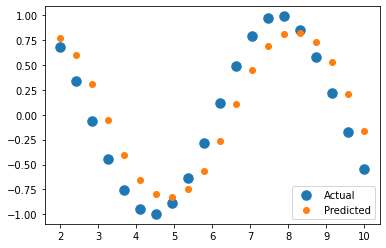

In [64]:
data_time_steps = np.linspace(2, 10, x.shape[0])

pl.scatter(data_time_steps[:], y.data.numpy(), s = 90, label = "Actual")
pl.scatter(data_time_steps[:], predictions, label = "Predicted")
pl.legend()
pl.show()

In [20]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 48
Name:  weight_ih_l0
shape:  torch.Size([6, 1])
Parameter containing:
tensor([[-0.8065],
        [ 0.1771],
        [-0.8170],
        [ 0.8130],
        [ 0.8252],
        [-0.8257]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-3.2082e-01,  2.5052e-01, -1.2359e-01,  1.7802e-01,  8.7040e-02,
         -1.6337e-01],
        [-2.3736e-01,  3.7018e-01,  3.4390e-01, -3.2391e-02,  3.6817e-01,
         -3.4018e-01],
        [-2.9130e-01, -1.4683e-01,  6.7102e-02, -1.1024e-02, -8.6213e-02,
          1.6474e-04],
        [ 2.3286e-01,  2.3885e-01, -3.5169e-01, -3.4843e-01,  1.0673e-01,
         -2.1323e-01],
        [ 2.9536e-01,  2.4716e-01, -2.3826e-01, -2.2648e-02,  1.1460e-01,
         -3.9898e-01],
        [ 2.8494e-01, -3.8583e-01,  6.8416e-02, -2.5032e-01,  2.9895e-01,
         -1.7028e-01]], requires_grad=True)
Name:  weight
shape:  torch.Size([1, 6])
Parameter containing:
tensor([[-0.1924,  0.0106, -0.2410, 

### RNN with one layer configured as Many-to-one

In [65]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

In this example, we have sequential data and we are going to implement an RNN with a Many-to-one configuration!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SeqData_RNN.png" width="400">


In [66]:
# Define the input size, hidden size and number of outputs
input_size = 2
hidden_size = 6
output_size = 1
num_layers = 1
seq_length = 20

data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(torch.FloatTensor), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(torch.FloatTensor), requires_grad=False)

In order to create an RNN, we follow the same steps as for implementing an ANN!

1. Creating a Neural Network
2. Network Evaluation
3. Gradient Calculation
4. Back Propagation
5. Training


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn_vis.gif" width="400">



In [67]:
# 1. Creating an RNN model
rnn = torch.nn.RNN(input_size, hidden_size, bias=False)

# Initialize the output layer
fc = torch.nn.Linear(hidden_size, output_size, bias=False)


# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.3)

In [68]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 54
Name:  weight_ih_l0
shape:  torch.Size([6, 2])
Parameter containing:
tensor([[ 0.1972, -0.2539],
        [-0.1686,  0.3213],
        [ 0.3860,  0.1619],
        [ 0.2199, -0.3887],
        [ 0.2631, -0.3738],
        [-0.3716,  0.1908]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[ 0.2076,  0.1659,  0.1476,  0.1567, -0.2824,  0.2494],
        [-0.2183, -0.1542,  0.1734,  0.0442,  0.0307, -0.0092],
        [-0.2469, -0.3998, -0.3396,  0.3520,  0.1074,  0.0057],
        [-0.2816,  0.3824, -0.0446, -0.1048,  0.2515,  0.1607],
        [-0.1352, -0.2461,  0.0843,  0.1480, -0.2529, -0.3741],
        [-0.3007, -0.3699,  0.1233,  0.0510, -0.1828, -0.2400]],
       requires_grad=True)
Name:  weight
shape:  torch.Size([1, 6])
Parameter containing:
tensor([[ 0.0460,  0.0649,  0.2891, -0.0740,  0.0914, -0.1281]],
       requires_grad=True)


In [69]:
epochs = 300
seq_length = 1
lr = 0.1

In [70]:
for i in range(epochs):
   total_loss = 0

   # Initialize the hidden state
   h0 = torch.zeros(1,  hidden_size)
   
   for j in range(x.size(0) - 1):
      input = x[j:(j+2)]
      target = y[j:(j+2)]

      # Forward pass
      out, hn = rnn(input.t(), h0)

      # 2. Model Evaluation
      y_pred = fc(hn.squeeze(0))
      loss = criterion(y_pred.view(-1), target)
    
      # 3. Gradient Calculation
      optimizer.zero_grad()
      total_loss += loss
      loss.backward()

      # 4. Back Propagation
      optimizer.step()

   # display loss 
   if i % 10 == 0:
      print("Epoch: {} loss {}".format(i, total_loss.data))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 loss 4.4336838722229
Epoch: 10 loss 1.7661694288253784
Epoch: 20 loss 1.3932373523712158
Epoch: 30 loss 1.1979223489761353
Epoch: 40 loss 1.0892937183380127
Epoch: 50 loss 1.0232353210449219
Epoch: 60 loss 0.9800454378128052
Epoch: 70 loss 0.9501742124557495
Epoch: 80 loss 0.9285774230957031
Epoch: 90 loss 0.9123901724815369
Epoch: 100 loss 0.899886965751648
Epoch: 110 loss 0.8899769186973572
Epoch: 120 loss 0.8819431662559509
Epoch: 130 loss 0.8752987384796143
Epoch: 140 loss 0.8697041869163513
Epoch: 150 loss 0.864916980266571
Epoch: 160 loss 0.8607602119445801
Epoch: 170 loss 0.8571029901504517
Epoch: 180 loss 0.853847324848175
Epoch: 190 loss 0.8509175777435303
Epoch: 200 loss 0.8482558727264404
Epoch: 210 loss 0.8458172082901001
Epoch: 220 loss 0.8435659408569336
Epoch: 230 loss 0.841473400592804
Epoch: 240 loss 0.8395176529884338
Epoch: 250 loss 0.8376795053482056
Epoch: 260 loss 0.8359445929527283
Epoch: 270 loss 0.8343004584312439
Epoch: 280 loss 0.8327372670173645
Epo

In [71]:
predictions = []

for i in range(x.size(0) - 1):
   input = x[i:i+2]
   # Forward pass
   out, hn = rnn(input.t(), h0)
   # Pass the hidden state through the output layer
   y_pred = fc(hn.squeeze(0))
   predictions.append(y_pred.data.numpy().ravel()[0])

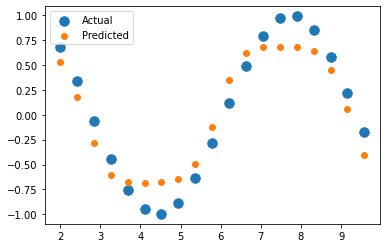

In [72]:
data_time_steps = np.linspace(2, 10, x.shape[0])

pl.scatter(data_time_steps[:-1], y.data[:-1].numpy(), s = 90, label = "Actual")
pl.scatter(data_time_steps[:-1], predictions, label = "Predicted")
pl.legend()
pl.show()

In [44]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 54
Name:  weight_ih_l0
shape:  torch.Size([6, 2])
Parameter containing:
tensor([[-1.0623,  1.6469],
        [-0.2183,  0.4557],
        [ 0.0235, -0.9632],
        [-0.2005,  1.0576],
        [-0.5270, -0.6371],
        [ 0.4598, -1.2108]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-0.3402,  0.1997, -0.2267, -0.1469, -0.0959, -0.0933],
        [-0.0663,  0.3926,  0.0180, -0.0361,  0.3734, -0.2884],
        [ 0.2821,  0.0024,  0.4007,  0.3000,  0.2085, -0.3537],
        [-0.0050,  0.3329, -0.3460, -0.0841,  0.1212, -0.2376],
        [-0.0543, -0.1468,  0.0025, -0.4041, -0.3034, -0.0545],
        [ 0.2107,  0.1552,  0.1369,  0.1960, -0.3657, -0.2092]],
       requires_grad=True)
Name:  weight
shape:  torch.Size([1, 6])
Parameter containing:
tensor([[ 0.3965,  0.0039, -0.3568,  0.2759, -0.0582, -0.2657]],
       requires_grad=True)


## RNN with two layers configured as One-to-one

In this example, we have sequential data and we are going to implement an RNN with 2 layers and a One-to-one configuration!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SeqData_RNN.png" width="400">


Let's use non-linear data with more complexity in this step!

In [106]:
# Define the input size, hidden size and number of outputs
input_size = 1
hidden_size = 6
output_size = 1
num_layers = 2
seq_length = 20

data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(torch.FloatTensor), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(torch.FloatTensor), requires_grad=False)

In order to create an RNN, we follow the same steps as for implementing an ANN!

1. Creating a Neural Network
2. Network Evaluation
3. Gradient Calculation
4. Back Propagation
5. Training


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn_vis.gif" width="400">



In [107]:
# 1. Creating a RNN model
rnn = torch.nn.RNN(input_size, hidden_size, bias=False, nonlinearity='tanh', num_layers=2)

# Initialize the output layer
fc = torch.nn.Linear(hidden_size, output_size, bias=False)


# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.01)

In [108]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 120
Name:  weight_ih_l0
shape:  torch.Size([6, 1])
Parameter containing:
tensor([[ 0.1916],
        [ 0.2838],
        [ 0.4044],
        [-0.0497],
        [ 0.3326],
        [-0.1160]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-0.1140, -0.1597, -0.1740, -0.1036,  0.3144, -0.1587],
        [ 0.0776, -0.3044, -0.3879, -0.2759,  0.1232, -0.0356],
        [-0.0471,  0.3522,  0.1215, -0.0336, -0.0521,  0.3693],
        [ 0.0164,  0.2419,  0.0861,  0.2870,  0.3733, -0.0289],
        [ 0.2916, -0.3038, -0.2628, -0.0831, -0.1746,  0.1464],
        [-0.0097, -0.3501,  0.2285,  0.0379, -0.0763, -0.0184]],
       requires_grad=True)
Name:  weight_ih_l1
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-0.0049,  0.1914,  0.2775, -0.3013,  0.2069, -0.1548],
        [-0.0451,  0.2137, -0.3049, -0.3861, -0.0614,  0.3395],
        [-0.1410, -0.3598,  0.3195,  0.3657,  0.3815,  0.0606],
        [ 0.3494,  0.0859,  

In [109]:
epochs = 1000
lr = 0.1

In [110]:
for i in range(epochs):
   total_loss = 0

   # Initialize the hidden state
   h0 = torch.zeros(2, hidden_size)
   for j in range(x.size(0)):
      input = x[j:(j+1)]
      target = y[j:(j+1)]


      # Forward pass
      out, hn = rnn(input, h0)

      # 2. Model Evaluation
      y_pred = fc(hn.squeeze(0))
      loss = criterion(y_pred.view(-1), target)
    
      # 3. Gradient Calculation
      optimizer.zero_grad()
      total_loss += loss
      loss.backward()

      # 4. Back Propagation
      optimizer.step()

   # display loss 
   if i % 10 == 0:
      print("Epoch: {} loss {}".format(i, total_loss.data))

Epoch: 0 loss 8.374932289123535
Epoch: 10 loss 5.686782360076904
Epoch: 20 loss 3.5747897624969482
Epoch: 30 loss 2.451029062271118
Epoch: 40 loss 2.011479377746582
Epoch: 50 loss 1.847974181175232
Epoch: 60 loss 1.782486915588379
Epoch: 70 loss 1.7531312704086304
Epoch: 80 loss 1.7382397651672363
Epoch: 90 loss 1.7297329902648926
Epoch: 100 loss 1.7243576049804688
Epoch: 110 loss 1.7206858396530151
Epoch: 120 loss 1.7180272340774536
Epoch: 130 loss 1.7160139083862305
Epoch: 140 loss 1.7144321203231812
Epoch: 150 loss 1.7131481170654297
Epoch: 160 loss 1.712074637413025
Epoch: 170 loss 1.7111529111862183
Epoch: 180 loss 1.7103424072265625
Epoch: 190 loss 1.709614634513855
Epoch: 200 loss 1.7089499235153198
Epoch: 210 loss 1.7083337306976318
Epoch: 220 loss 1.7077562808990479
Epoch: 230 loss 1.7072105407714844
Epoch: 240 loss 1.7066905498504639
Epoch: 250 loss 1.706193208694458
Epoch: 260 loss 1.7057151794433594
Epoch: 270 loss 1.705254316329956
Epoch: 280 loss 1.7048085927963257
Epoch:

In [111]:
predictions = []

for i in range(x.size(0)):
   input = x[i:i+1]

   # Forward pass
   out, hn = rnn(input, h0)
   # Pass the hidden state through the output layer
   y_pred = fc(hn.squeeze(0))
   predictions.append(y_pred.data.numpy().ravel()[0])

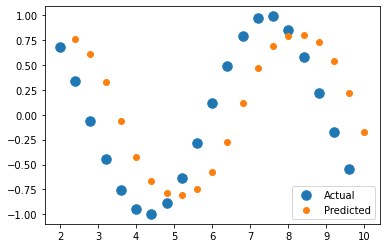

In [112]:
pl.scatter(data_time_steps[:-1], y.data[:].numpy().tolist(), s = 90, label = "Actual")
pl.scatter(data_time_steps[1:], predictions, label = "Predicted")
pl.legend()
pl.show()

In [113]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 120
Name:  weight_ih_l0
shape:  torch.Size([6, 1])
Parameter containing:
tensor([[-0.8414],
        [ 0.9114],
        [ 0.9045],
        [ 0.4599],
        [ 0.2188],
        [ 0.1276]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-0.1140, -0.1597, -0.1740, -0.1036,  0.3144, -0.1587],
        [ 0.0776, -0.3044, -0.3879, -0.2759,  0.1232, -0.0356],
        [-0.0471,  0.3522,  0.1215, -0.0336, -0.0521,  0.3693],
        [ 0.0164,  0.2419,  0.0861,  0.2870,  0.3733, -0.0289],
        [ 0.2916, -0.3038, -0.2628, -0.0831, -0.1746,  0.1464],
        [-0.0097, -0.3501,  0.2285,  0.0379, -0.0763, -0.0184]],
       requires_grad=True)
Name:  weight_ih_l1
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[ 0.1744, -0.2518, -0.2931, -0.5115, -0.1677, -0.2222],
        [-0.2144,  0.6169,  0.2105, -0.1945,  0.2724,  0.4004],
        [-0.1648, -0.1263,  0.6475,  0.4655,  0.6405,  0.0818],
        [ 0.2835,  0.1885,  